расчет технико-экономичекских показателей

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [3]:
# Загрузка данных
gdf = gpd.read_file('zoning_tag.geojson')
gdf['zoning_tag'] = gdf['zoning_tag'].astype("category")

# Проверяем и удаляем строки с пустыми значениями zoning_tag и геометрией
gdf = gdf.dropna(subset=['zoning_tag'])
gdf = gdf[~gdf['geometry'].is_empty]

# Исправляем геометрию (устраняем топологические ошибки)
gdf['geometry'] = gdf['geometry'].buffer(0)


In [4]:
# Добавляем столбец с площадью каждого квартала (в квадратных метрах)
gdf['area'] = gdf.geometry.area

In [6]:
# Общая площадь города
total_city_area = gdf['area'].sum()

# Считаем площадь каждой зоны
zone_areas = gdf.groupby('zoning_tag')['area'].sum().to_dict()

C:\Users\User\AppData\Local\Temp\ipykernel_25292\1690482536.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zone_areas = gdf.groupby('zoning_tag')['area'].sum().to_dict()


In [7]:
# Добавляем в GeoDataFrame столбец area_city (процент квартала от города)
gdf['area_city'] = (gdf['area'] / total_city_area) * 100

In [8]:
# 🔹 6. Добавляем в GeoDataFrame столбец area_zone (процент квартала от зоны)
gdf['area_zone'] = gdf.apply(lambda row: (row['area'] / zone_areas[row['zoning_tag']]) * 100, axis=1)

In [27]:
gdf

,Зона,zoning_tag,geometry,area,area_city,area_zone
2,ТД1-1_1,PUBLIC_AND_BUSINESS,"POLYGON ((3373712.579 8385251.612, 3373743.594...",3.562697e+04,0.000764,0.007718
3,ТД2_1,PUBLIC_AND_BUSINESS,"POLYGON ((3373939.959 8384632.388, 3373939.901...",2.093329e+03,0.000045,0.000453
4,ТД2_1,PUBLIC_AND_BUSINESS,"POLYGON ((3373827.838 8384502.448, 3373823.108...",1.197619e+04,0.000257,0.002594
5,ТД2_1,PUBLIC_AND_BUSINESS,"POLYGON ((3373920.024 8384354.447, 3373920.039...",9.505281e+04,0.002038,0.020591
6,ТД1-1_1,PUBLIC_AND_BUSINESS,"POLYGON ((3372440.427 8379201.641, 3372438.963...",4.765576e+04,0.001022,0.010324
...,...,...,...,...,...,...
7157,ТР2,RECREATIONAL,"POLYGON ((3336747.174 8419985.493, 3336773.6 8...",4.721771e+04,0.001013,0.002657
7158,ТР2,RECREATIONAL,"POLYGON ((3336214.332 8419562.903, 3336318.864...",2.403590e+03,0.000052,0.000135
7159,Т1Ж2-2,RESIDENTIAL,"POLYGON ((3338995.718 8402909.162, 3339000.462...",6.172420e+06,0.132371,0.466296
7160,ТР1,RECREATIONAL,"POLYGON ((3359348.393 8401121.685, 3359358.978...",2.729093e+07,0.585269,1.535514


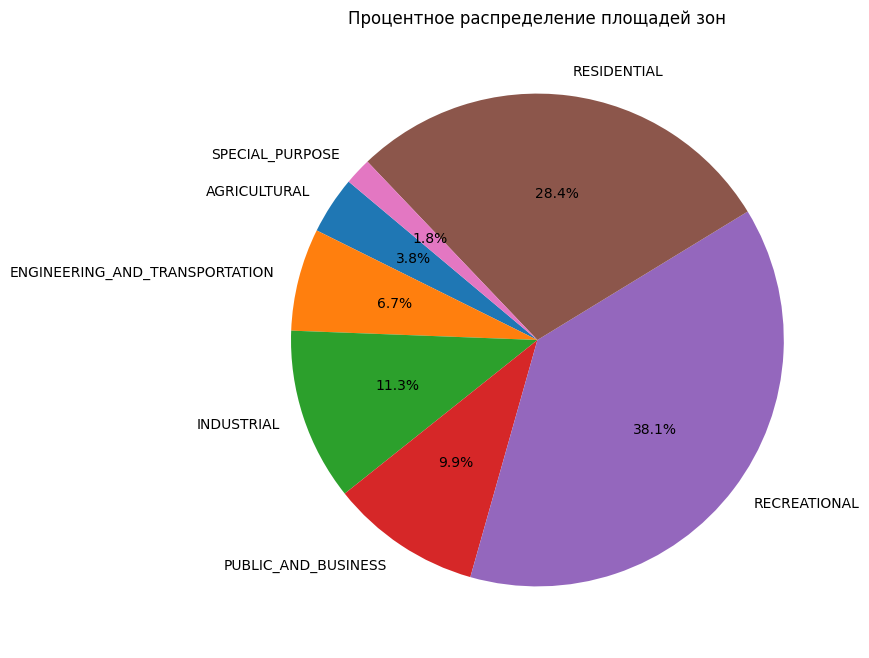

In [26]:
import matplotlib.pyplot as plt

# Создаём обычный пайчарт
plt.figure(figsize=(8, 8))
plt.pie(zone_areas.values(), labels=zone_areas.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Процентное распределение площадей зон")
plt.show()

In [12]:
# Выводим площадь города и зон в виде словаря
print(f"Общая площадь города: {total_city_area / 1_000_000:.2f} км²")

zone_areas_str = "\n".join([f"{zone}: {area / 1_000_000:.2f} км²" for zone, area in zone_areas.items()])
print(f"Площадь зон:\n{zone_areas_str}")

Общая площадь города: 4662.97 км²
Площадь зон:
AGRICULTURAL: 176.19 км²
ENGINEERING_AND_TRANSPORTATION: 313.70 км²
INDUSTRIAL: 527.76 км²
PUBLIC_AND_BUSINESS: 461.62 км²
RECREATIONAL: 1777.32 км²
RESIDENTIAL: 1323.71 км²
SPECIAL_PURPOSE: 82.69 км²
